In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Agregar la carpeta 'src' al sys.path
import sys
import os
src_path = "../../src/"
sys.path.append(src_path)
import support_modeling as sp

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_pickle("../../results/cluster_0.pkl")
df

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,...,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_robust,Quantity_robust,Discount_robust,Profit_robust,Shipping Cost_robust,clusters_kmeans
185,1,0,0,0,0,0,0,1,0,0,...,0,1,2,3,6.156041,1.666667,2.5,-34.196691,16.551565,0
197,1,0,0,1,0,0,0,0,0,0,...,1,0,1,2,8.244505,1.000000,2.0,-9.582847,16.215009,0
207,0,0,1,1,0,0,0,0,0,0,...,0,0,2,3,6.798192,1.000000,2.0,-23.549976,16.084715,0
208,0,1,0,0,0,0,0,0,0,1,...,1,0,1,2,7.794999,1.000000,1.0,-9.296161,16.069521,0
214,0,0,1,0,0,0,0,1,0,0,...,0,0,2,2,10.704291,1.333333,0.5,-6.791879,15.917127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49490,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,-0.345552,-0.333333,3.5,-0.820387,-0.360497,0
49491,0,0,1,0,0,0,1,0,0,0,...,1,0,2,1,-0.234184,1.000000,3.0,-1.580706,-0.360497,0
49492,0,1,0,1,0,0,0,0,0,0,...,1,0,2,2,-0.266836,-0.333333,0.0,-0.203972,-0.360958,0
49493,0,1,0,1,0,0,0,0,0,0,...,1,0,2,1,-0.093488,0.666667,0.0,-0.133305,-0.360958,0


In [3]:
df2=pd.read_pickle("../../results/cluster_sinencod_0.pkl")
df2

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
185,First Class,Consumer,EU,Technology,1440.840,8,0.5,-1268.040,367.35,Critical,0
197,Second Class,Consumer,APAC,Office Supplies,1900.584,6,0.4,-348.516,360.04,High,0
207,Same Day,Home Office,APAC,Furniture,1582.200,6,0.4,-870.300,357.21,Critical,0
208,Second Class,Corporate,US,Office Supplies,1801.632,6,0.2,-337.806,356.88,High,0
214,First Class,Home Office,EU,Furniture,2442.069,7,0.1,-244.251,353.57,High,0
...,...,...,...,...,...,...,...,...,...,...,...
49490,Standard Class,Corporate,Africa,Office Supplies,9.612,2,0.7,-21.168,0.02,Medium,0
49491,First Class,Home Office,EMEA,Office Supplies,34.128,6,0.6,-49.572,0.02,Medium,0
49492,Same Day,Corporate,APAC,Office Supplies,26.940,2,0.0,1.860,0.01,High,0
49493,Same Day,Corporate,APAC,Office Supplies,65.100,5,0.0,4.500,0.01,Medium,0


In [4]:
df=df.drop(columns=["clusters_kmeans","Profit_robust","Quantity_robust","Discount_robust"])

In [5]:
df["Sales_robust"]=df2["Sales"]

In [6]:
x=df.drop("Sales_robust",axis=1)
y=df[["Sales_robust"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [7]:
# Definición de los hiperparámetros a optimizar
param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 15, 20, 25],  
    'min_samples_split': [2, 5, 10, 20], 
    'min_samples_leaf': [1, 2, 5, 10],  
}

# Configuración de GridSearchCV para la optimización de hiperparámetros
model_RandomForestRegressor = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',  
    cv=5,  
    n_jobs=-1,  
)

# Entrenamiento del modelo con la búsqueda de hiperparámetros
model_RandomForestRegressor.fit(x_train, y_train)

best_rf_model = model_RandomForestRegressor.best_estimator_

In [8]:
y_test_pred_rf = best_rf_model.predict(x_test)
y_train_pred_rf = best_rf_model.predict(x_train)
sp.metricas(y_train, y_train_pred_rf, y_test, y_test_pred_rf)

,r2_score,MAE,MSE,RMSE
Train,0.855900,44.848200,8245.390000,90.804100
Test,0.803700,50.475000,11378.983100,106.672300
Diferencia Train-Test,0.052200,-5.626800,-3133.593100,-15.868200
Porcentaje diferencia (%),1.572700,-2.951400,-7.983900,-4.017700
Rango valores,2951.155000,2951.155000,2951.155000,2951.155000
Ratio Rango (%),0.028118,1.615015,332.486316,3.345748
Influencia dif rango (%),0.001800,0.190700,106.181900,0.537700
Media,171.514200,171.514200,171.514200,171.514200
Ratio Media(%),0.483808,27.788720,5720.917889,57.568528
Influencia dif media (%),0.030400,3.280700,1827.016700,9.251800


<!--  -->

El modelo presenta un excelente ajuste en el conjunto de entrenamiento y generaliza bien en el conjunto de prueba, con diferencias menores entre ambos. Los errores son bajos y consistentes, aunque existe un ligero sobreajuste que podría optimizarse. El modelo es confiable para predicciones, pero se podrían explorar mejoras para manejar aún mejor valores extremos y reducir la diferencia residual entre los conjuntos.

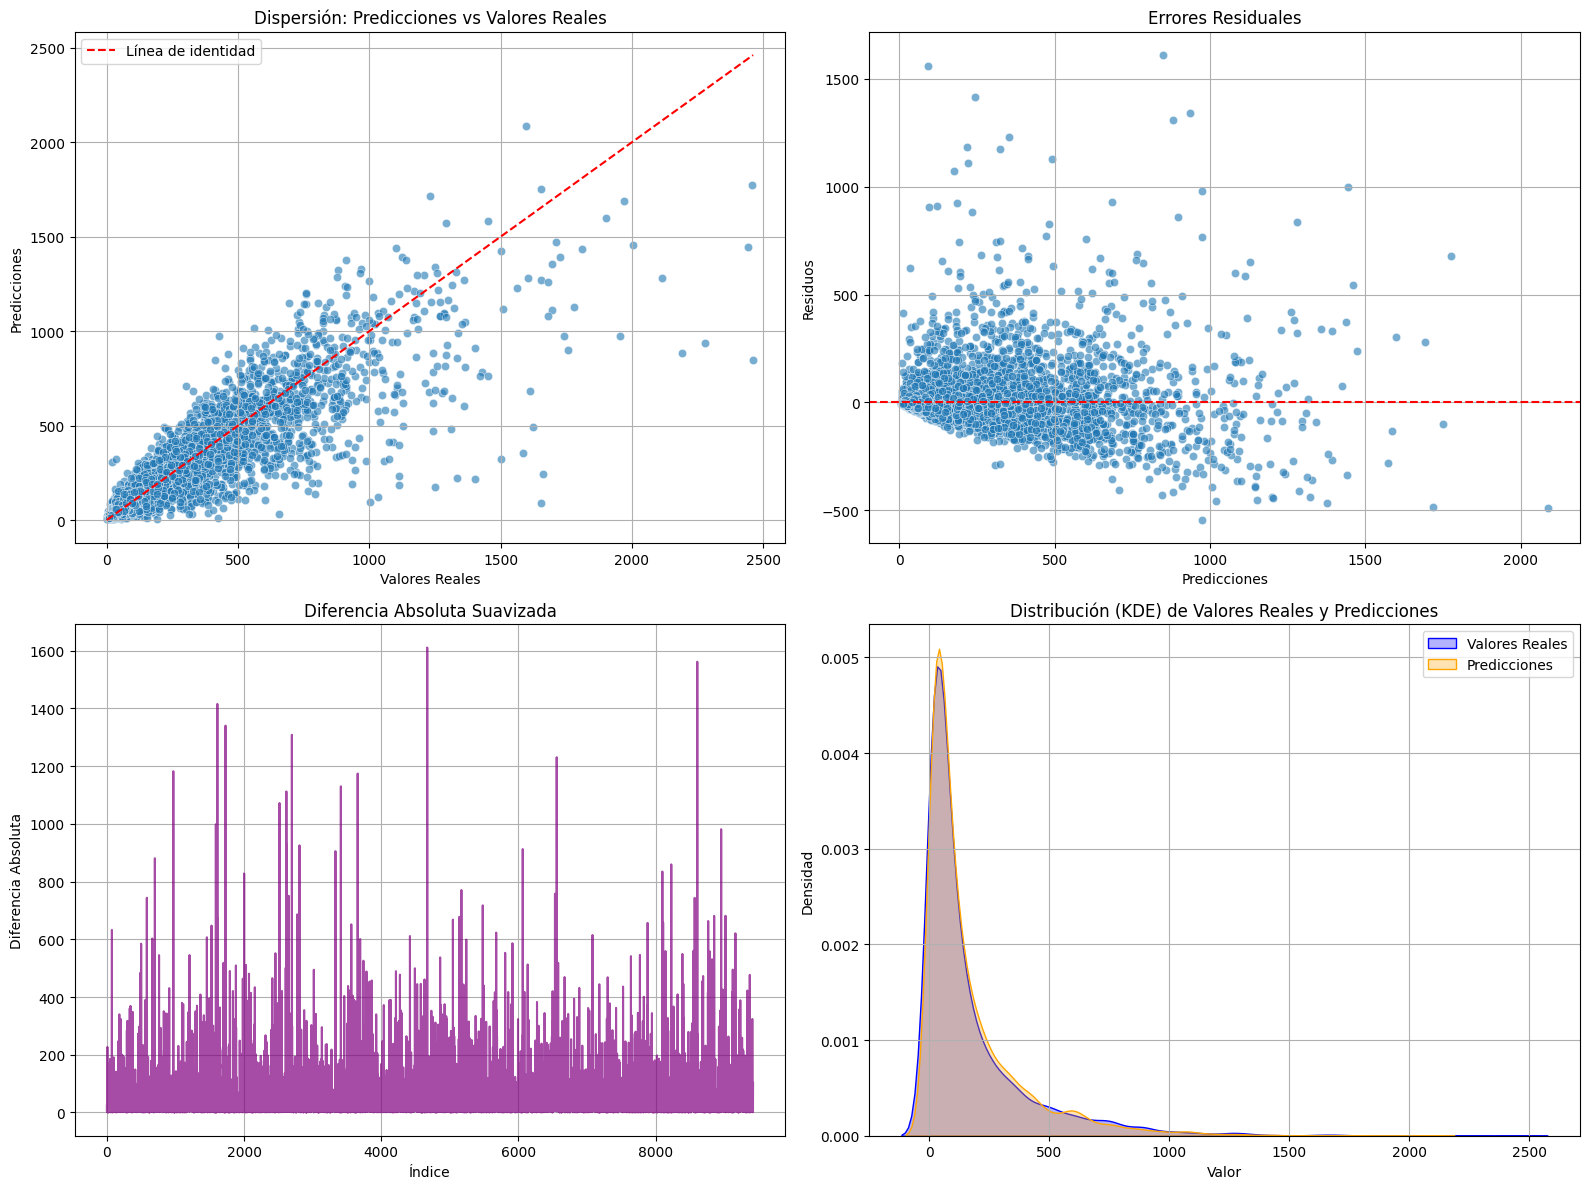

In [9]:
sp.comparativa_graficos(y_test, y_test_pred_rf)

Gráfico superior izquierdo: Dispersión (Predicciones vs Valores Reales)
- Las predicciones están razonablemente alineadas con los valores reales en rangos bajos y medios, con una buena correspondencia con la línea de identidad. Sin embargo, para valores altos, se observa una tendencia a subestimar, como lo muestra la dispersión de los puntos por debajo de la línea roja. Este comportamiento sugiere que el modelo tiene un rendimiento más confiable en valores bajos.

Gráfico superior derecho: Errores Residuales
- Los residuales están distribuidos principalmente alrededor de cero, lo que indica un buen desempeño general del modelo. Sin embargo, se observa una mayor dispersión de los errores para valores altos de predicción, reflejando que el modelo tiene más dificultades para capturar correctamente los patrones de valores extremos.

Gráfico inferior izquierdo: Diferencia Absoluta Suavizada
- Las diferencias absolutas son bajas en la mayoría de los datos, generalmente debajo de 500, pero existen algunos picos significativos que indican errores más grandes en ciertas predicciones. Estos picos podrían estar relacionados con outliers o situaciones donde el modelo no logra ajustarse adecuadamente.

Gráfico inferior derecho: Distribución (KDE) de Valores Reales y Predicciones
- Las distribuciones de valores reales y predicciones son muy similares, lo que sugiere que el modelo captura bien la tendencia global de los datos. Sin embargo, las predicciones presentan una ligera desviación en valores altos, lo que respalda la observación de que el modelo tiende a subestimar en este rango.

In [10]:
import pickle

# Guardar el modelo entrenado
with open('../../models/model_RandomForestRegressor_cluster_0.pkl', 'wb') as file:
    pickle.dump(model_RandomForestRegressor, file)